<a href="https://colab.research.google.com/github/Aryan-401/GoogleColabProjects/blob/main/FashionMNIST-LinearNNvsNonLinearNNvsConvNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


# Getting a dataset

Fashion MNIST Dataset

In [ ]:
train_data = datasets.FashionMNIST(root= 'data',
                                   train= True,
                                   download= True,
                                   transform = ToTensor(),
                                   target_transform= None)
test_data = datasets.FashionMNIST(root= 'data',
                                   train= False,
                                   download= True,
                                   transform = ToTensor(),
                                   target_transform= None)

100%|██████████| 26421880/26421880 [00:04<00:00, 6602662.03it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 118542.05it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2194864.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13580048.42it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

See the first training example

In [ ]:
image, label =  train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
print(class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

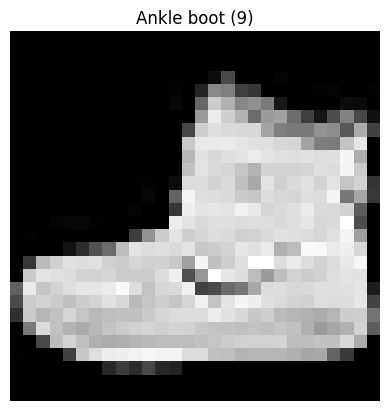

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'{class_names[label]} ({label})')
plt.axis(False)

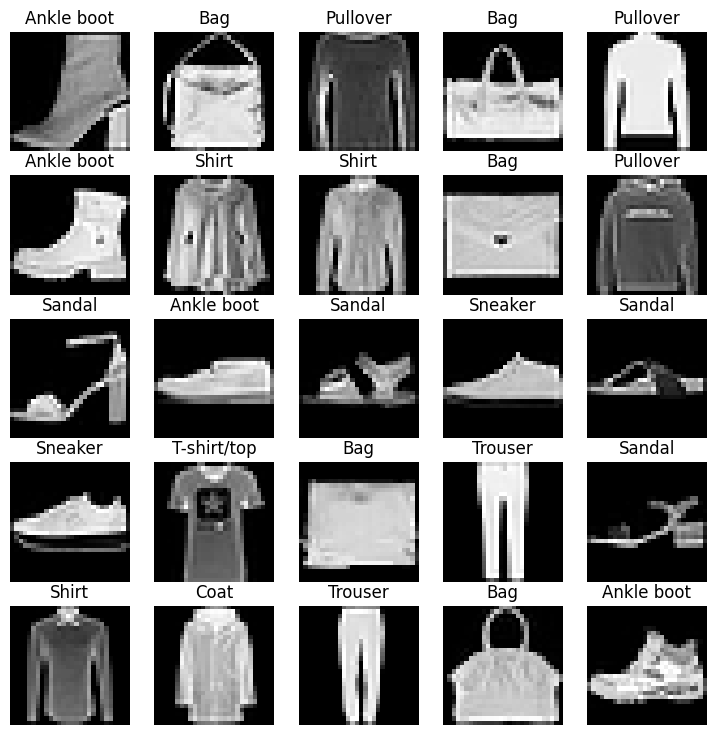

In [ ]:
fig = plt.figure(figsize = (9,9))
rows, cols = 5,5
for i in range (1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'{class_names[label]}')
    plt.axis(False)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data, batch_size = BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset= test_data, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape)

torch.Size([32, 1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

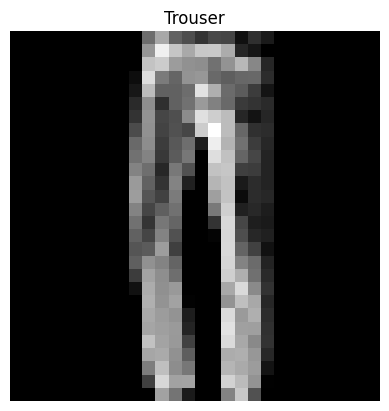

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'{class_names[label]}')
plt.axis(False)

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch [0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
output = flatten_model(x)
print(output.shape)

torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)



In [ ]:
model_0 = FashionMNISTModelV0(input_shape = 784,
                 hidden_units = 128,
                 output_shape = 10)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
# dummy_x = torch.rand(1, 1, 28, 28)
# model_0(dummy_x).shape

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:
from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n ---")
    training_loss = 0
    for batch, (X, y) in tqdm(enumerate(train_dataloader)):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        training_loss += loss

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        if batch % 400 == 0:
            print(f"Total Samples Seen: {batch * len(X)}/{len(train_dataloader.dataset)}")

    training_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Train Loss: {training_loss:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ---


0it [00:00, ?it/s]

Total Samples Seen: 0/60000
Total Samples Seen: 12800/60000
Total Samples Seen: 25600/60000
Total Samples Seen: 38400/60000
Total Samples Seen: 51200/60000
Train Loss: 0.5764 | Test Loss: 0.5426 | Test Accuracy: 81.0903
Epoch: 1
 ---


0it [00:00, ?it/s]

Total Samples Seen: 0/60000
Total Samples Seen: 12800/60000
Total Samples Seen: 25600/60000
Total Samples Seen: 38400/60000
Total Samples Seen: 51200/60000
Train Loss: 0.4723 | Test Loss: 0.4944 | Test Accuracy: 82.4181
Epoch: 2
 ---


0it [00:00, ?it/s]

Total Samples Seen: 0/60000
Total Samples Seen: 12800/60000
Total Samples Seen: 25600/60000
Total Samples Seen: 38400/60000
Total Samples Seen: 51200/60000
Train Loss: 0.4538 | Test Loss: 0.4830 | Test Accuracy: 82.7276


In [ ]:
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def eval_model(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = torch.device('cpu')):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataLoader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim =1))
        loss /= len(dataLoader)
        acc /= len(dataLoader)

        return {'model_name': model.__class__.__name__, 'model_loss': loss.item(), 'model_acc': acc}

In [ ]:
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4830431044101715, 'model_acc': 82.7276357827476}


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)



In [ ]:
model_1 = FashionMNISTModelV1(input_shape = 784,
                 hidden_units = 10,
                 output_shape = 10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimiser,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device = device)
print(model_1_results)
print(model_0_results)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.44069 | Train accuracy: 84.53%
Test loss: 0.48670 | Test accuracy: 82.83%

Epoch: 1
---------
Train loss: 0.44069 | Train accuracy: 84.53%
Test loss: 0.48670 | Test accuracy: 82.83%

Epoch: 2
---------
Train loss: 0.44069 | Train accuracy: 84.53%
Test loss: 0.48670 | Test accuracy: 82.83%

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.4866950809955597, 'model_acc': 82.82747603833866}
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4830431044101715, 'model_acc': 82.7276357827476}


In [ ]:
class FashionMNISTModelV2(nn.Module):
    '''
    TinyVGG ConvNet
    '''

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels = hidden_units, kernel_size = 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, # there is a trick to find this
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
model_2 = FashionMNISTModelV2(input_shape=1, #number of channels
                              hidden_units= 10,
                              output_shape = 10).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimiser,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.67520 | Train accuracy: 75.39%
Test loss: 0.38245 | Test accuracy: 86.40%

Epoch: 1
---------
Train loss: 0.34902 | Train accuracy: 87.33%
Test loss: 0.33292 | Test accuracy: 88.37%

Epoch: 2
---------
Train loss: 0.30775 | Train accuracy: 88.89%
Test loss: 0.31913 | Test accuracy: 88.58%



In [ ]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
print(model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.3191286325454712, 'model_acc': 88.57827476038338}


In [ ]:
import pandas as pd
compare_stats = pd.DataFrame([model_0_results, model_1_results, model_2_results])
print(compare_stats)

            model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.483043  82.727636
1  FashionMNISTModelV1    0.486695  82.827476
2  FashionMNISTModelV2    0.319129  88.578275


In [ ]:
torch.save(obj = model_2.state_dict(), f='models/CNN.pt')